In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
import wordcloud
import warnings
import matplotlib.cm as cm
from matplotlib import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('../data_csv/call.csv')

In [4]:
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,updated_utc,og_description,og_title,gilded,thumbnail_height,thumbnail_width,rte_mode,link_flair_template_id,previous_visits,author_id
0,[],False,tinyrogue,NaN,[],NaN,text,t2_4bdtecyt,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Philly448,NaN,[],NaN,text,t2_3dojt7zl,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,helmaron,NaN,[],NaN,text,t2_3vf0i836,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],True,brir_b,NaN,[],NaN,text,t2_524a3zlf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,brir_b,NaN,[],NaN,text,t2_524a3zlf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[['title', 'selftext', 'subreddit']]

In [6]:
df

,title,selftext,subreddit
0,What do you guys enjoy about your job?,"Call centre work is fucking hard, and for the ...",talesfromcallcenters
1,"Why the rich stay rich, maybe",TLDR at end \n\nI work in a credit card call c...,talesfromcallcenters
2,Speechless and sad,I am an occasional customer of various call ce...,talesfromcallcenters
3,Misogynistic Guy Demands A Pie Chart,I've never posted on reddit before! So if some...,talesfromcallcenters
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,talesfromcallcenters
...,...,...,...
3995,What’s the dumbest thing someone has complaine...,"Well hi folks, today one of our new advisors w...",talesfromcallcenters
3996,"Oh, it's an emergency? Okay, I'll just stop re...",Interpreter call. \n\nGuy says he has no hot w...,talesfromcallcenters
3997,"I want the top, TOP guy!!!",So I once got a call that went like this...\n\...,talesfromcallcenters
3998,New to this subreddit but i have many Stories....,Side Note- I worked in a call center for a cou...,talesfromcallcenters


In [7]:
df["title"]= df["title"].str.replace("just", " ")
df["selftext"]= df["selftext"].str.replace("just", " ")
df["title"]= df["title"].str.replace("amp", " ")
df["selftext"]= df["selftext"].str.replace("amp", " ")

In [8]:
df.replace('\'','', regex=True, inplace=True) 
df = df.replace("[^a-zA-Z]", " ", regex=True)

In [9]:
df

,title,selftext,subreddit
0,What do you guys enjoy about your job,Call centre work is fucking hard and for the ...,talesfromcallcenters
1,Why the rich stay rich maybe,TLDR at end I work in a credit card call cen...,talesfromcallcenters
2,Speechless and sad,I am an occasional customer of various call ce...,talesfromcallcenters
3,Misogynistic Guy Demands A Pie Chart,Ive never posted on reddit before So if somet...,talesfromcallcenters
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,talesfromcallcenters
...,...,...,...
3995,What s the dumbest thing someone has complaine...,Well hi folks today one of our new advisors w...,talesfromcallcenters
3996,Oh its an emergency Okay Ill stop respond...,Interpreter call Guy says he has no hot wat...,talesfromcallcenters
3997,I want the top TOP guy,So I once got a call that went like this M...,talesfromcallcenters
3998,New to this subreddit but i have many Stories ...,Side Note I worked in a call center for a cou...,talesfromcallcenters


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(3943, 3)

In [12]:
df = df[~df.selftext.str.contains("removed")]

In [13]:
df = df[~df.selftext.str.contains("deleted")]

In [14]:
df.shape

(3344, 3)

In [15]:
cv = CountVectorizer(stop_words = 'english', min_df = 5)

X_cv = cv.fit_transform(df['selftext'])

X_cv

<3344x6203 sparse matrix of type '<class 'numpy.int64'>'
	with 318156 stored elements in Compressed Sparse Row format>

In [16]:
df_features = pd.DataFrame(data = X_cv.todense(),
                          columns = cv.get_feature_names())
df_features.head()

,ab,aback,abc,ability,able,abroad,abrupt,abruptly,absences,absent,...,younger,youre,youtube,youve,yrs,yup,zero,zip,zone,zones
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


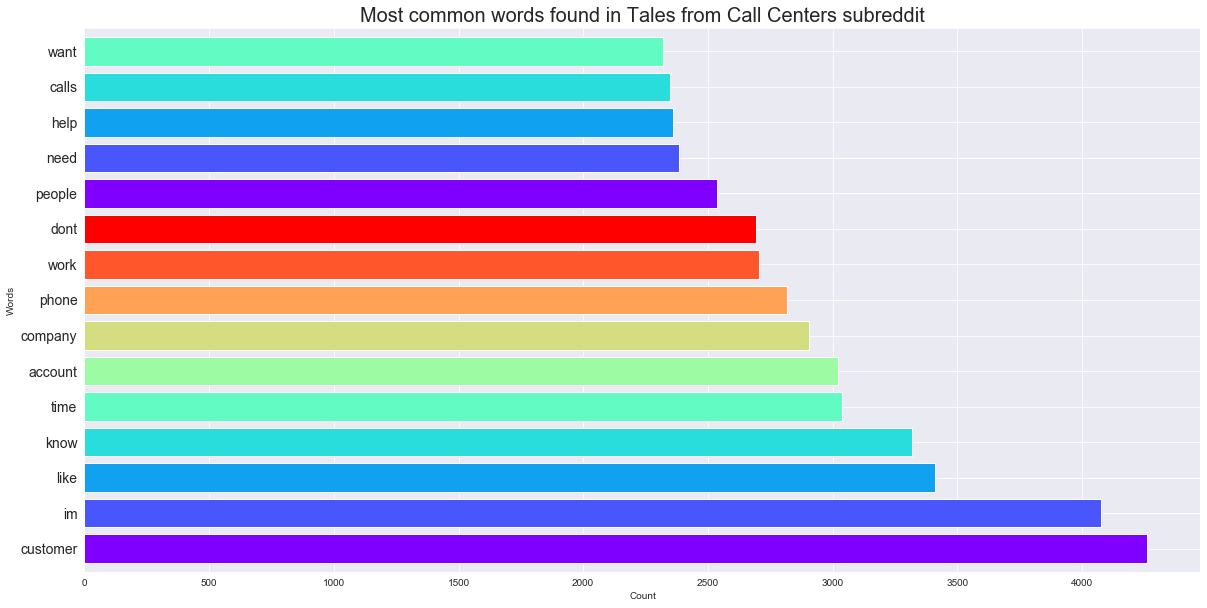

In [29]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
sns.set_style("darkgrid")
plt.title('Most common words found in Tales from Call Centers subreddit', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Words')
plt.yticks(fontsize=14)
df_features.sum().sort_values(ascending = False).head(15).plot.barh(color=colors, width =.8)

In [18]:
df_features.sum().sort_values(ascending = False).head(30)

customer    4262
im          4078
like        3410
know        3317
time        3039
account     3020
company     2907
phone       2816
work        2705
dont        2693
people      2538
need        2384
help        2360
calls       2347
want        2320
got         2266
going       2155
day         2076
number      1943
did         1848
said        1788
service     1692
tell        1662
told        1649
calling     1512
sir         1487
right       1472
sorry       1471
center      1459
called      1446
dtype: int64

In [19]:
df_features['just'].sum()

479

In [20]:
## Define a function which can be applied to calculate the score for the whole dataset
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['selftext'].apply(senti)

In [21]:
df.head(10)

,title,selftext,subreddit,senti_score
0,What do you guys enjoy about your job,Call centre work is fucking hard and for the ...,talesfromcallcenters,"(0.17546296296296301, 0.5925925925925927)"
1,Why the rich stay rich maybe,TLDR at end I work in a credit card call cen...,talesfromcallcenters,"(0.05918154761904762, 0.4706051587301589)"
2,Speechless and sad,I am an occasional customer of various call ce...,talesfromcallcenters,"(0.2299019607843137, 0.3968627450980392)"
3,Misogynistic Guy Demands A Pie Chart,Ive never posted on reddit before So if somet...,talesfromcallcenters,"(0.09579824909050262, 0.47178304871966864)"
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,talesfromcallcenters,"(0.04187943575698678, 0.438123214653827)"
5,Paycheck Protection Program,I work for one of the Big Banks in the small b...,talesfromcallcenters,"(-0.025313283208020062, 0.6246867167919801)"
6,I wonder if that customer still thinks about t...,I used to work for a large UK commercial credi...,talesfromcallcenters,"(0.055297334244702664, 0.3635850991114149)"
7,Have You Ever Gone the Extra Mile simply becau...,An older lady called me at our call center wan...,talesfromcallcenters,"(0.005952380952380939, 0.4154761904761905)"
9,Thank you from a call center customer,Im not a call center professional so I hope I...,talesfromcallcenters,"(0.1464285714285714, 0.4547619047619048)"
10,Customer Wants To Report Me To Myself,I work in the complaint department CD for a ...,talesfromcallcenters,"(0.046164507936507934, 0.5317066031746032)"


In [33]:
df['selftext'][0]

'Call centre work is fucking hard  and for the most part  joyless  Ive worked on phones pretty much my whole working life  I was a alumni fundraiser in university  did a stint of survey phone calls  now I work on a helpdesk   Were working from home at the moment  and its so rubbish  were incredibly busy and understaffed and everyone is a pool of unhappiness     Just wanted to see if you guys can share anything you actually like about your jobs  to lift us all up  its a shit ride for any callcentre workers at the moment   Personally  my colleagues are amazing  we are a small team and were genuinely like a family  I really love the problem solving aspect of my job as well  someone has an issue no one has ever seen before   Sounds perfect       I had a call yesterday that made me cry  but straight after i had an hour long call that I managed to turn around from an absolute Karen of bitching and complaining  to us both celebrating together when we managed to get the system working  we were

In [32]:
df['selftext'][6]

'I used to work for a large UK commercial credit card company a few years ago  On my last day of work  a middle aged man called in  He had forgotten to set up his new bank account as an auto payment for his credit card and he got charges for the same    He wasnt upset in any way  he was   confused as his bank was our sister company and he was told by them that they would take care of it through their back end processing  He asked me nicely if there was anything I could do to salvage the issue    I had been having a bad day  This  along with his politeness and the fact that it was my last day  made me decide to waive off his charges on the spot  I also told him that I would credit     to his card as a sign of good faith and gratitude   I did this without placing the call on hold to speak to a supervisor     He seemed elated and surprised  He thanked me and ended the call but didnt actually hang up and I overheard him telling his wife  I assume  how nice I was  I cut the call myself afte

In [24]:
df[['senti_score']] = df[['senti_score']].astype(str)

In [25]:
df

,title,selftext,subreddit,senti_score
0,What do you guys enjoy about your job,Call centre work is fucking hard and for the ...,talesfromcallcenters,"Sentiment(polarity=0.17546296296296301, subjec..."
1,Why the rich stay rich maybe,TLDR at end I work in a credit card call cen...,talesfromcallcenters,"Sentiment(polarity=0.05918154761904762, subjec..."
2,Speechless and sad,I am an occasional customer of various call ce...,talesfromcallcenters,"Sentiment(polarity=0.2299019607843137, subject..."
3,Misogynistic Guy Demands A Pie Chart,Ive never posted on reddit before So if somet...,talesfromcallcenters,"Sentiment(polarity=0.09579824909050262, subjec..."
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,talesfromcallcenters,"Sentiment(polarity=0.04187943575698678, subjec..."
...,...,...,...,...
3995,What s the dumbest thing someone has complaine...,Well hi folks today one of our new advisors w...,talesfromcallcenters,"Sentiment(polarity=0.1378656696838515, subject..."
3996,Oh its an emergency Okay Ill stop respond...,Interpreter call Guy says he has no hot wat...,talesfromcallcenters,"Sentiment(polarity=0.140625, subjectivity=0.68..."
3997,I want the top TOP guy,So I once got a call that went like this M...,talesfromcallcenters,"Sentiment(polarity=0.4666666666666666, subject..."
3998,New to this subreddit but i have many Stories ...,Side Note I worked in a call center for a cou...,talesfromcallcenters,"Sentiment(polarity=0.10976190476190477, subjec..."


In [26]:
df['selftext'][3997]

'So I once got a call that went like this     Me  Hello and thank you for calling  Herp Derp   my name is J   cut off by caller  Caller  My name is Barbara and my phone number is yada yada  You people have  rattles of list of issues  and I want the top  TOP guy to call me immediately   lt click gt     hangs up   Never got a word in  never pulled up an account   I guess shes still waiting for the top  TOP guy to call her back  LOL'

In [27]:
df['senti_score'][3997]

'Sentiment(polarity=0.4666666666666666, subjectivity=0.45)'

In [36]:
df['selftext'][3995]

'Well hi folks  today one of our new advisors was trying to hold back laughter as the customer complained their phone was faulty   because ads popped up in their apps while playing games    After she sent them on their way we all sat about reminiscing some of the dumbest complaints we d handled  I work in a telecoms provider  selling sims and handset contracts etc  we re the escalates complaints team  one step down from the regulators team  By the time they reach us they ve cost us more money than the value of several contracts  so we don t care when they threaten to leave  it ll save the company money in the long run   While I ve got some GEMS  the funniest according to the newer advisors was the customer who called to complain that they didn t like the sound of their own recorded voice on his voicemail  And wanted compensation  Naturally   What is the DUMBEST thing someone has thought they had the right to complain and be compensated for '